<a href="https://colab.research.google.com/github/niangmag/NLP-Assignment-3/blob/Topic_Modeling/Topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pickle

# Rename your uploaded file if needed
file_path = 'newsgroups'

with open(file_path, 'rb') as f:
    newsgroup_data = pickle.load(f)

print(f"Total documents: {len(newsgroup_data)}")
print("Sample:\n", newsgroup_data[0])

Total documents: 2000
Sample:
 The best group to keep you informed is the Crohn's and Colitis Foundation
of America.  I do not know if the UK has a similar organization.  The
address of
the CCFA is 

CCFA
444 Park Avenue South
11th Floor
New York, NY  10016-7374
USA

They have a lot of information available and have a number of newsletters.
 
Good Luck.


In [4]:
# Session 2: Text Cleaning and Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Added this line

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(doc):
    # Lowercase
    doc = doc.lower()
    # Remove non-alphabetic characters
    doc = re.sub(r'[^a-z\s]', '', doc)
    # Tokenize and remove stopwords
    tokens = nltk.word_tokenize(doc)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

cleaned_data = [preprocess(doc) for doc in newsgroup_data]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
# Session 3: Vectorization
# TF-IDF for NMF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, max_df=0.95, min_df=2)
tfidf = tfidf_vectorizer.fit_transform(cleaned_data)

# Count Vectorizer for LDA
count_vectorizer = CountVectorizer(max_features=1000, max_df=0.95, min_df=2)
count = count_vectorizer.fit_transform(cleaned_data)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
count_feature_names = count_vectorizer.get_feature_names_out()

In [6]:
# Session 4: LDA
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(count)

# Function to display topics
def display_topics(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}: {[feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]}")

print("\nLDA Topics:")
display_topics(lda, count_feature_names)


LDA Topics:
Topic 1: ['problem', 'doctor', 'patient', 'new', 'power', 'know', 'anyone', 'period', 'thanks', 'cause']
Topic 2: ['ground', 'cable', 'port', 'pin', 'one', 'like', 'switch', 'mac', 'monitor', 'use']
Topic 3: ['drive', 'disk', 'scsi', 'controller', 'system', 'hard', 'bios', 'floppy', 'support', 'card']
Topic 4: ['game', 'team', 'year', 'player', 'play', 'win', 'last', 'season', 'first', 'hockey']
Topic 5: ['one', 'use', 'get', 'would', 'also', 'work', 'good', 'card', 'bit', 'much']
Topic 6: ['car', 'would', 'year', 'get', 'one', 'know', 'like', 'price', 'old', 'anyone']
Topic 7: ['dont', 'think', 'one', 'get', 'time', 'like', 'would', 'well', 'say', 'people']
Topic 8: ['would', 'one', 'people', 'god', 'think', 'say', 'dont', 'many', 'argument', 'something']
Topic 9: ['space', 'system', 'data', 'center', 'information', 'nasa', 'program', 'available', 'research', 'list']
Topic 10: ['car', 'bike', 'time', 'speed', 'get', 'good', 'oil', 'one', 'mile', 'much']


In [7]:
# Session 5: NMF
from sklearn.decomposition import NMF

nmf = NMF(n_components=10, random_state=42)
nmf.fit(tfidf)

print("\nNMF Topics:")
display_topics(nmf, tfidf_feature_names)


NMF Topics:
Topic 1: ['one', 'dont', 'people', 'think', 'get', 'thing', 'say', 'something', 'time', 'see']
Topic 2: ['game', 'team', 'player', 'play', 'hockey', 'win', 'season', 'leaf', 'playoff', 'first']
Topic 3: ['drive', 'scsi', 'disk', 'hard', 'floppy', 'cable', 'problem', 'boot', 'power', 'ide']
Topic 4: ['car', 'driver', 'engine', 'price', 'mile', 'dealer', 'owner', 'driving', 'auto', 'like']
Topic 5: ['thanks', 'anyone', 'please', 'know', 'email', 'advance', 'could', 'looking', 'post', 'info']
Topic 6: ['would', 'like', 'could', 'appreciated', 'made', 'theory', 'sound', 'computer', 'expensive', 'possible']
Topic 7: ['card', 'monitor', 'use', 'apple', 'chip', 'port', 'work', 'bit', 'vga', 'mhz']
Topic 8: ['bike', 'ride', 'honda', 'dod', 'mile', 'cost', 'look', 'seat', 'first', 'ive']
Topic 9: ['space', 'system', 'nasa', 'data', 'launch', 'program', 'orbit', 'shuttle', 'use', 'information']
Topic 10: ['year', 'last', 'ago', 'good', 'old', 'new', 'league', 'think', 'boston', 'mad

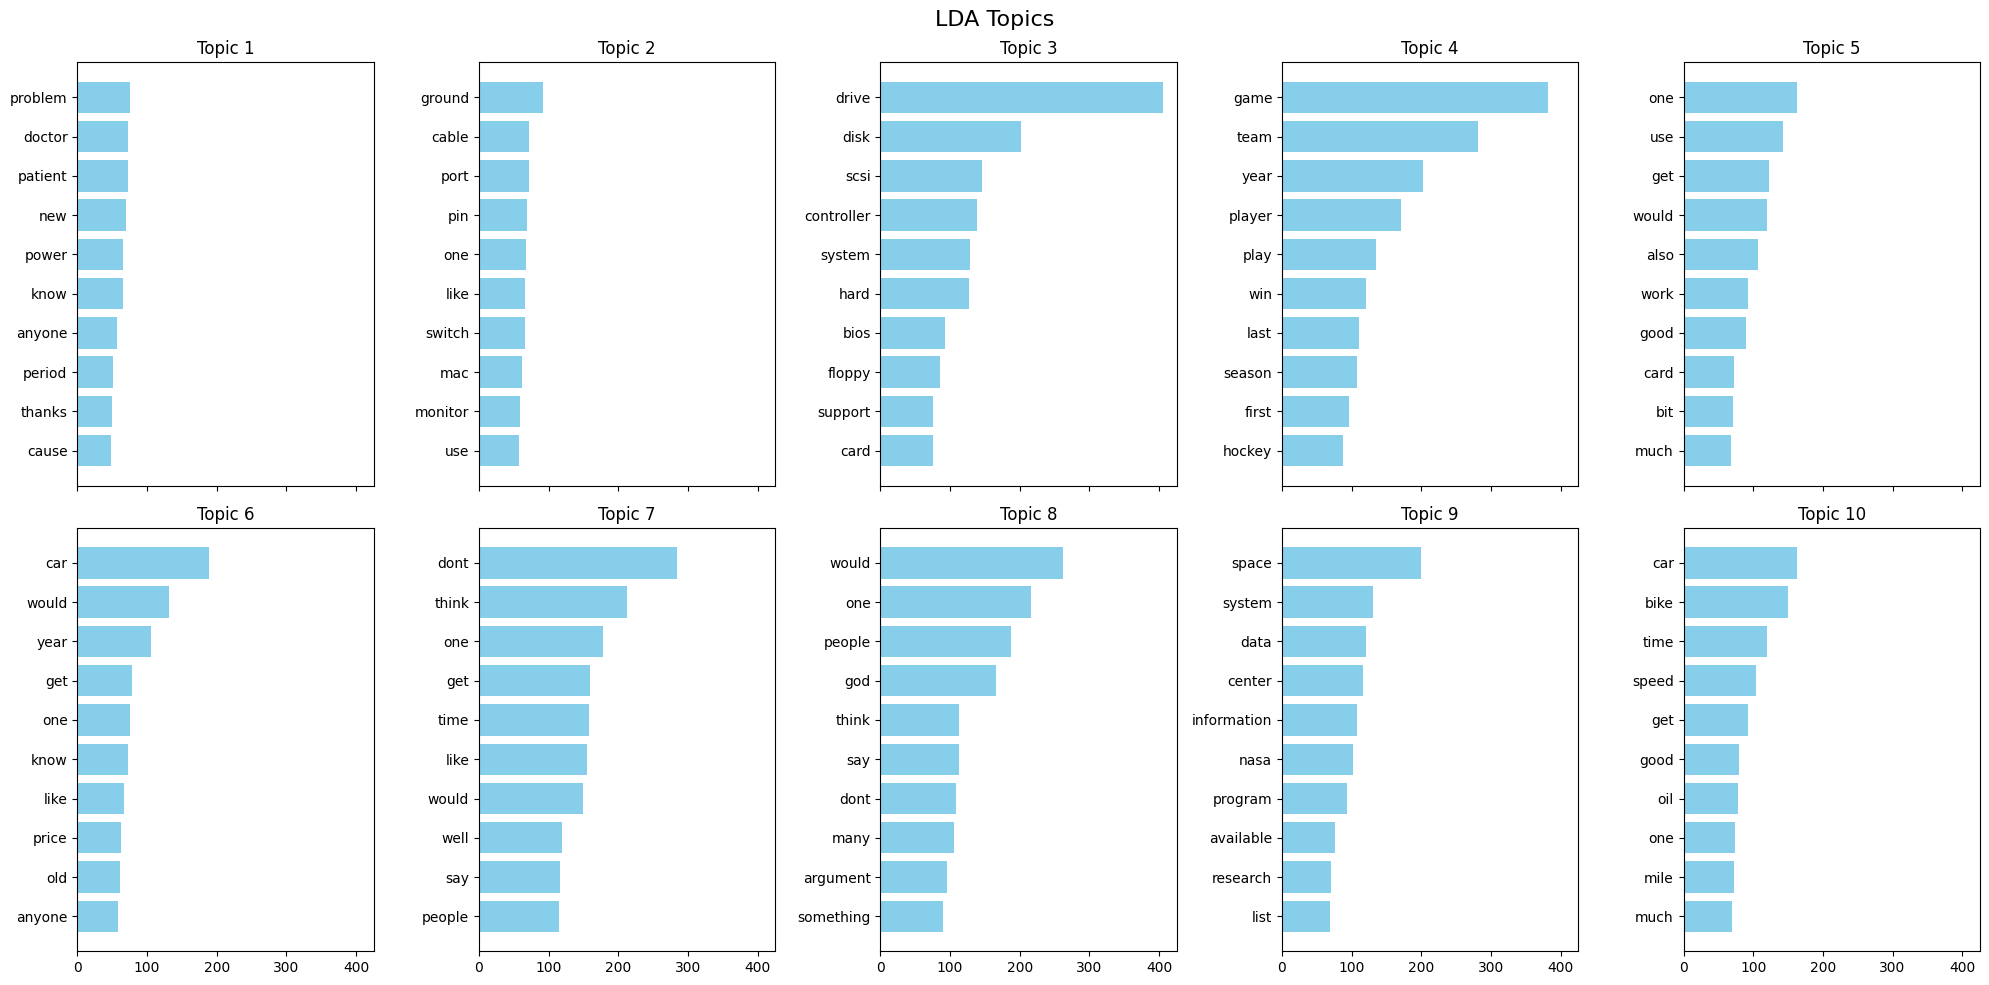

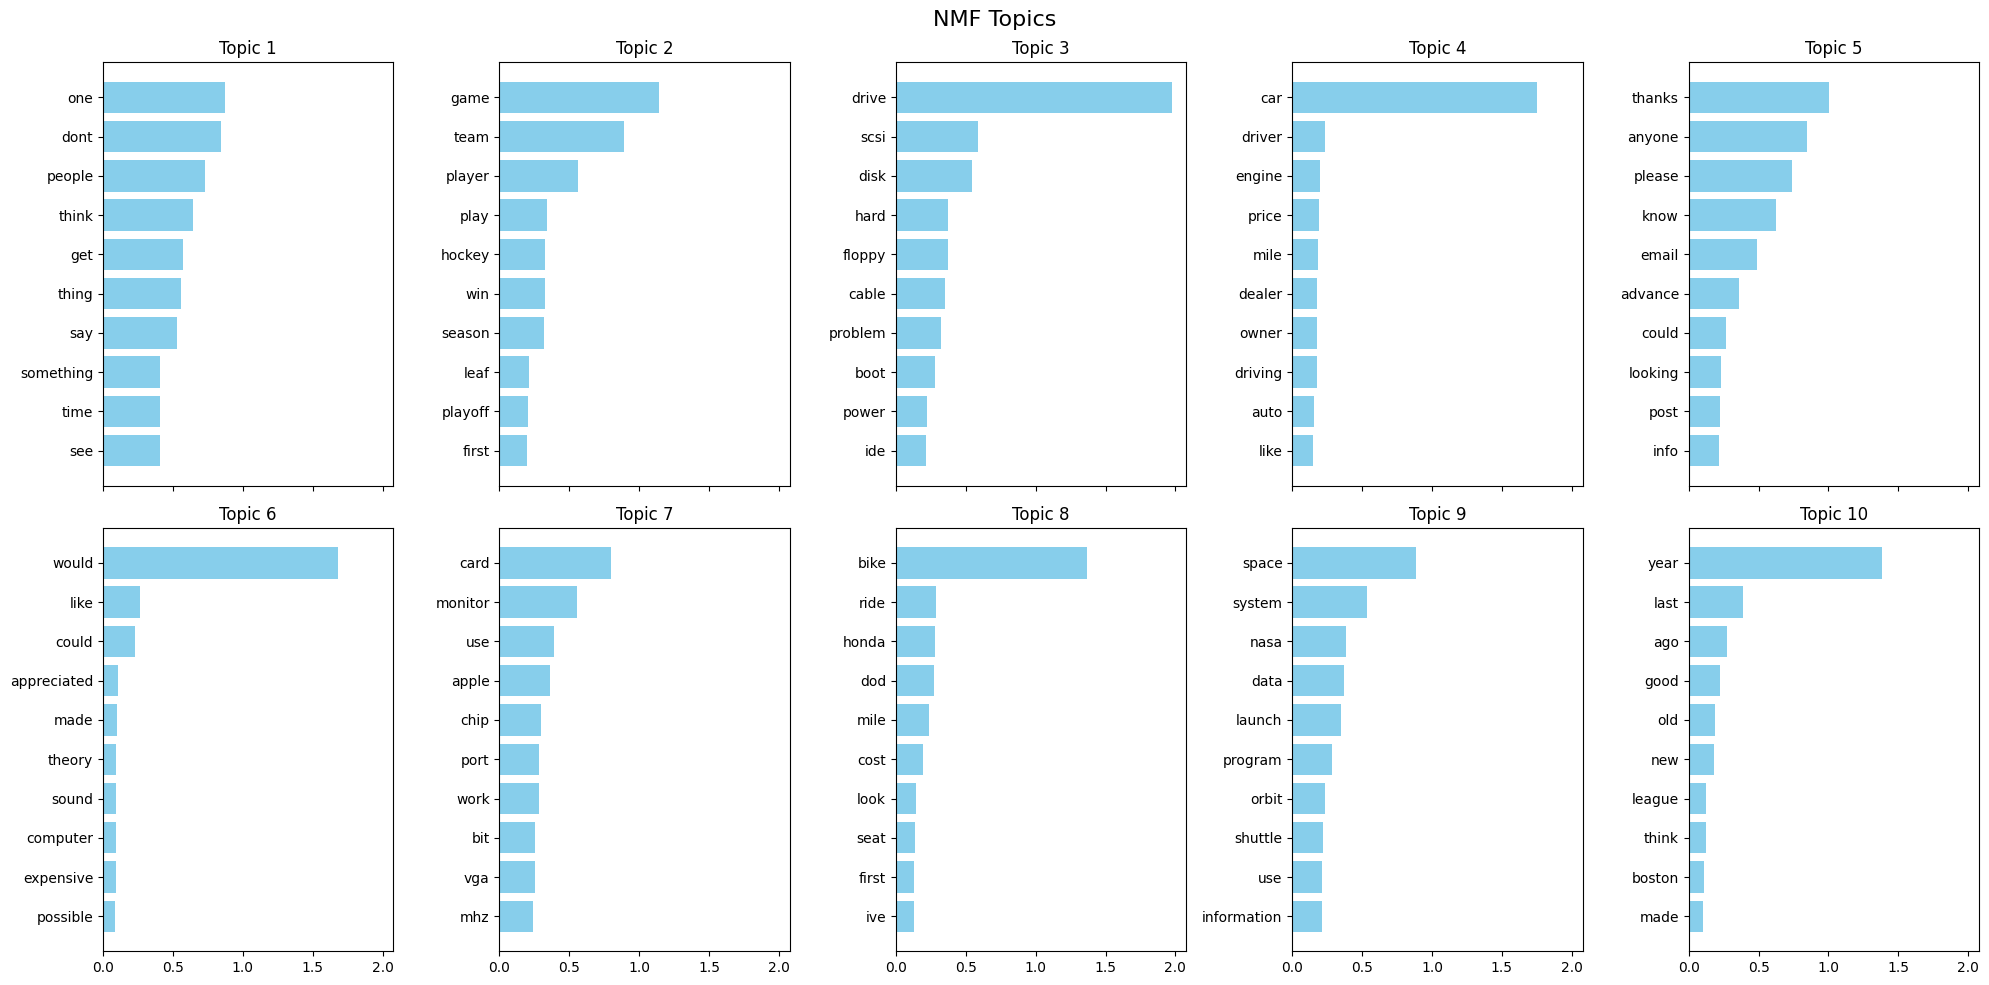

In [8]:
# Session 6: Visualization - Bar Charts
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words=10, title='Topics'):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharex=True)
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        top_features_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_idx]
        weights = topic[top_features_idx]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, color='skyblue')
        ax.set_title(f'Topic {topic_idx + 1}')
        ax.invert_yaxis()

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_top_words(lda, count_feature_names, title='LDA Topics')
plot_top_words(nmf, tfidf_feature_names, title='NMF Topics')

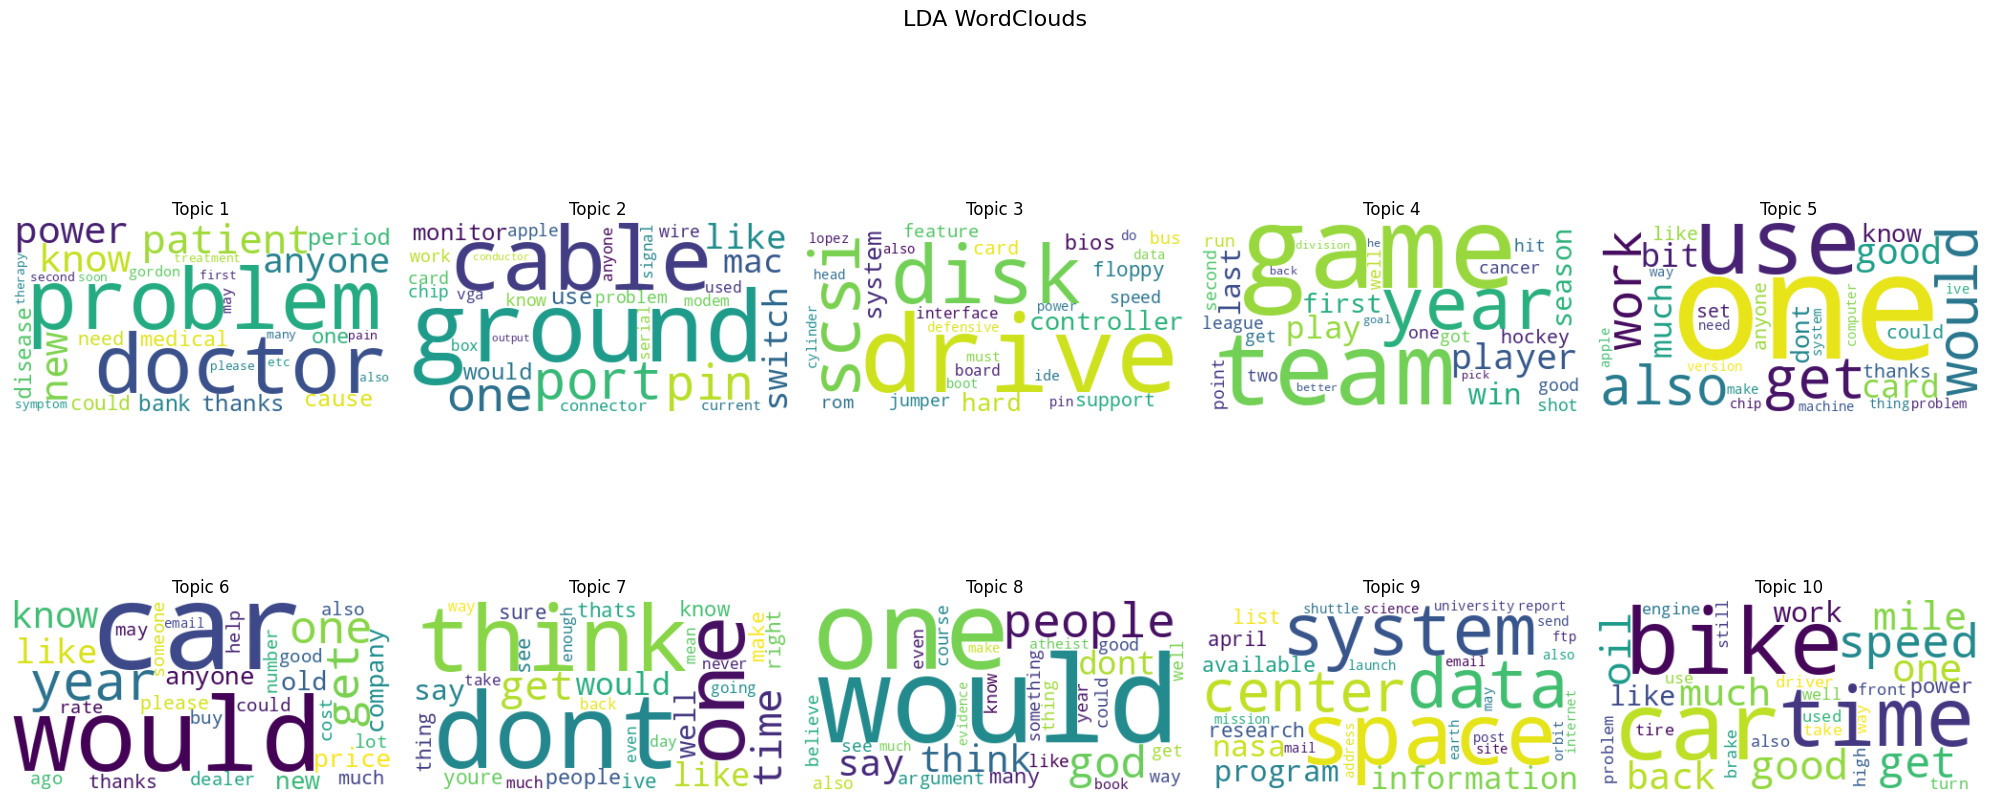

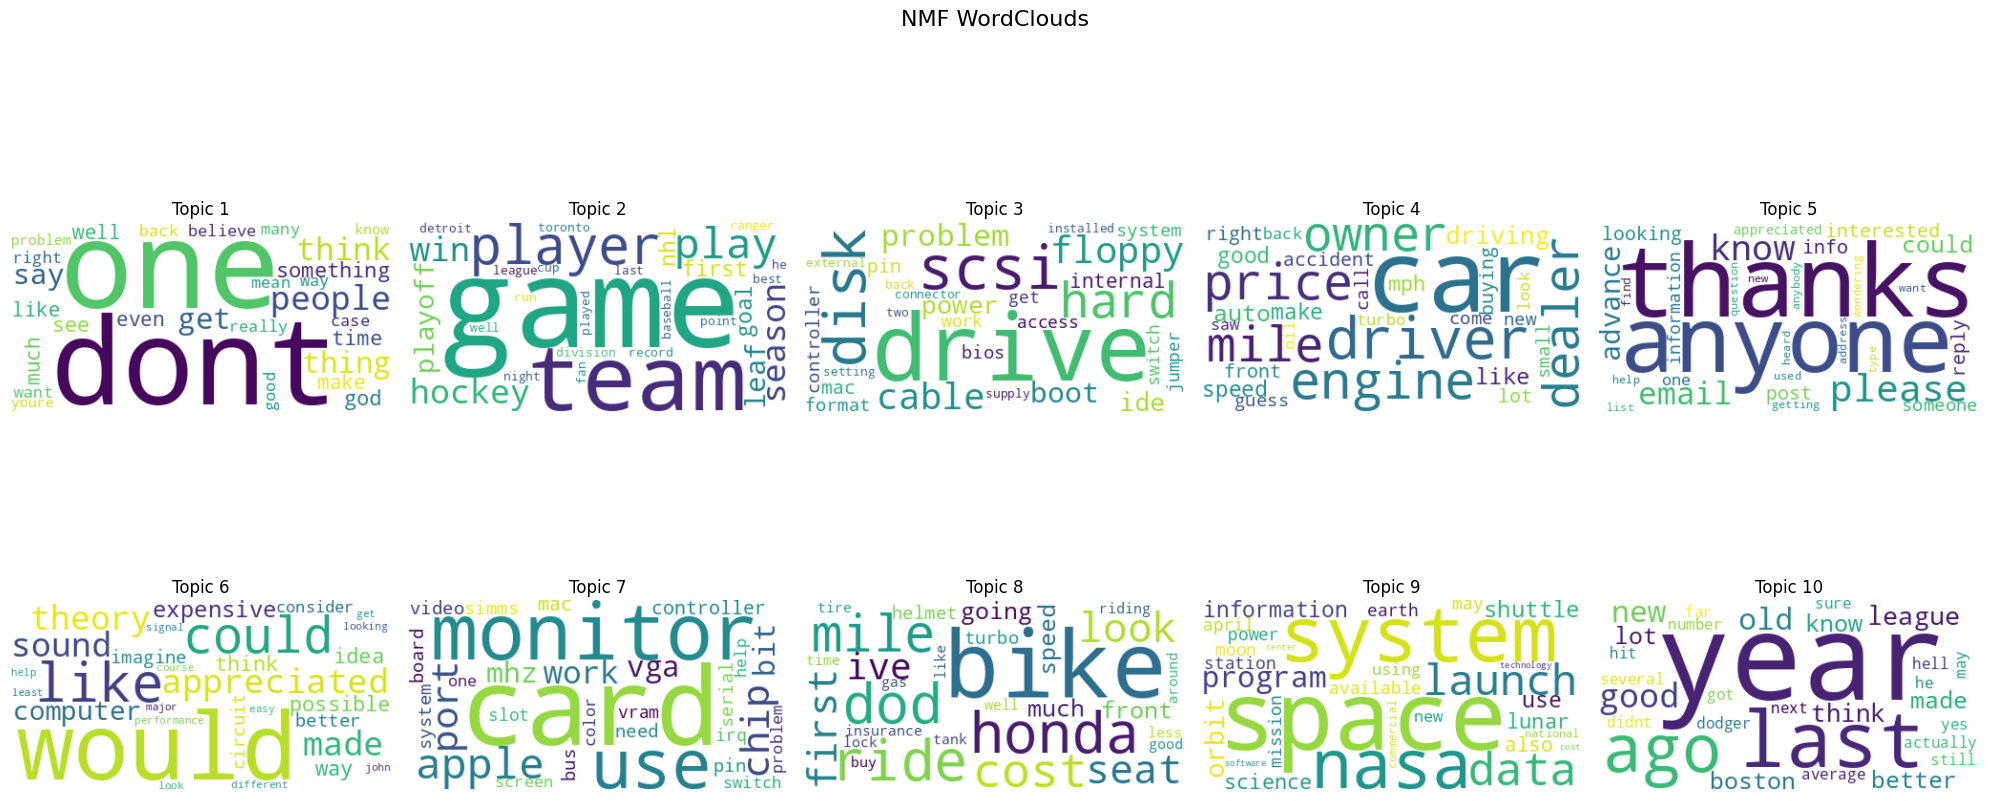

In [9]:
# Session 7: Visualization - WordClouds
from wordcloud import WordCloud

def plot_wordclouds(model, feature_names, title="WordClouds"):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    axes = axes.flatten()

    for i, topic in enumerate(model.components_):
        freqs = {feature_names[j]: topic[j] for j in topic.argsort()[:-30:-1]}
        wordcloud = WordCloud(background_color='white').generate_from_frequencies(freqs)
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f'Topic {i+1}')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_wordclouds(lda, count_feature_names, title='LDA WordClouds')
plot_wordclouds(nmf, tfidf_feature_names, title='NMF WordClouds')